In [ ]:
# EDA with 'Student Performance Indicator' dataset

## EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [ ]:
# importing necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# observing shape
df.shape

(1000, 8)

In [ ]:
# columns
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

## Data checks to perform
- Check Missing Values
- Check Duplicates
- Check Datatypes
- Check the number of values for each column
- Check statistics of dataset
- Check various categories present in the different categorical columns

In [ ]:
# checking missing values
# conclusion : there are no null values

df.isnull().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [ ]:
# checking duplicates
# conclusion: There are no duplicated records

df.duplicated().sum()

0

In [ ]:
# check datatypes
# conclusion : Dataset have two types of data,
# 1.Categorical ( datatype- object(string) ) : gender, race_ethnicity,
# parental_level_of_education, lunch, test_preparation_course
# 2.Numerical(datatype- int) features : math_score, reading_score, writing_score

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# checking the number of values for each column
# Conclusion : The categorical features like gender, lunch, test_preparation_course
# have only 2 unique values

print(df.nunique())

print()

print(df['gender'].unique())
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

['female' 'male']
['standard' 'free/reduced']
['none' 'completed']


In [ ]:
# checking statistics of the data
# conclusion:
# 1. The mean and std for all the 3 numerical features are close to each other
# 2. There is(are) student(s) who scored 0 marks in Mathematics

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# student who scored 0 marks in maths

df[df['math_score']==0].value_counts()

,,,,,,,,count
gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,
female,group C,some high school,free/reduced,none,0,17,10,1


In [ ]:
# Checking various categories present in the different categorical columns

for col in df.columns:
  if df[col].dtype == 'O':
    print( f'Unique values in "{col}" feature: \n {df[col].unique()} \n')

Unique values in "gender" feature: 
 ['female' 'male'] 

Unique values in "race_ethnicity" feature: 
 ['group B' 'group C' 'group A' 'group D' 'group E'] 

Unique values in "parental_level_of_education" feature: 
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Unique values in "lunch" feature: 
 ['standard' 'free/reduced'] 

Unique values in "test_preparation_course" feature: 
 ['none' 'completed'] 



### Segrregating Numerical and Categorical features

In [ ]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='O']

print(numerical_feature)
print(categorical_feature)


['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding required columns

In [ ]:
# adding 'total_score' column which will contain total of math_score, reading_score, writing_score
# adding 'avg_score' column

df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg_score'] = df['total_score'] / 3

In [ ]:
# descriptive stats
df.describe()

,math_score,reading_score,writing_score,total_score,avg_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


## Exploring through Visualizations

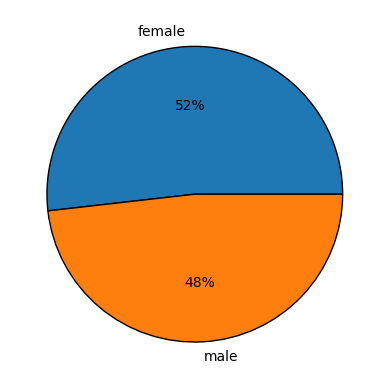

In [ ]:
# female/male distribution

fm = [df[df['gender']=='female'].value_counts().sum(),df[df['gender']=='male'].value_counts().sum()]
lbl=['female','male']
plt.pie(fm, labels=lbl, autopct='%1.0f%%', wedgeprops={'edgecolor':'black','linewidth':1})
plt.show()

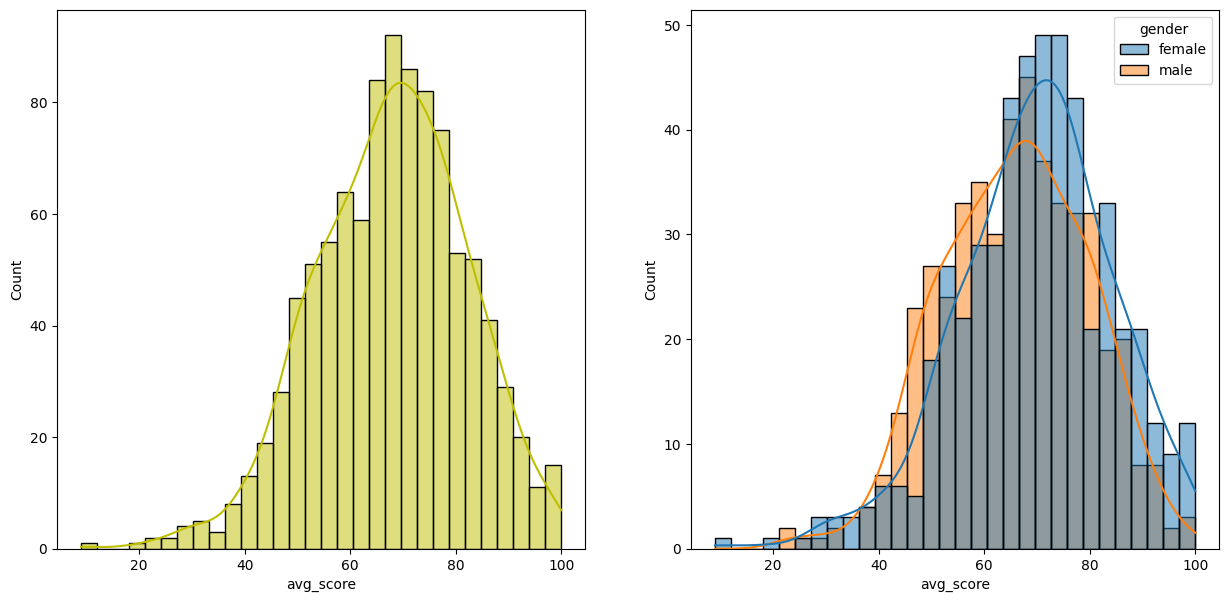

In [ ]:
# Visualizing average score 'gender' wise

fig,axis = plt.subplots(1,2,figsize=(15,7))

plt.subplot(1,2,1)
sns.histplot(data=df, x='avg_score', bins=30, kde=True, color='y' )

plt.subplot(1,2,2)
sns.histplot(data=df, x='avg_score', bins=30, kde=True, hue='gender')

plt.show()

In [ ]:
# Conclusion:
# 'female' students have higher 'avg_score' than 'male' students,
# means female students tend to perform better than male students.

Students who didn't complete test_preparation_course :  642
Students who completed test_preparation_course :  358


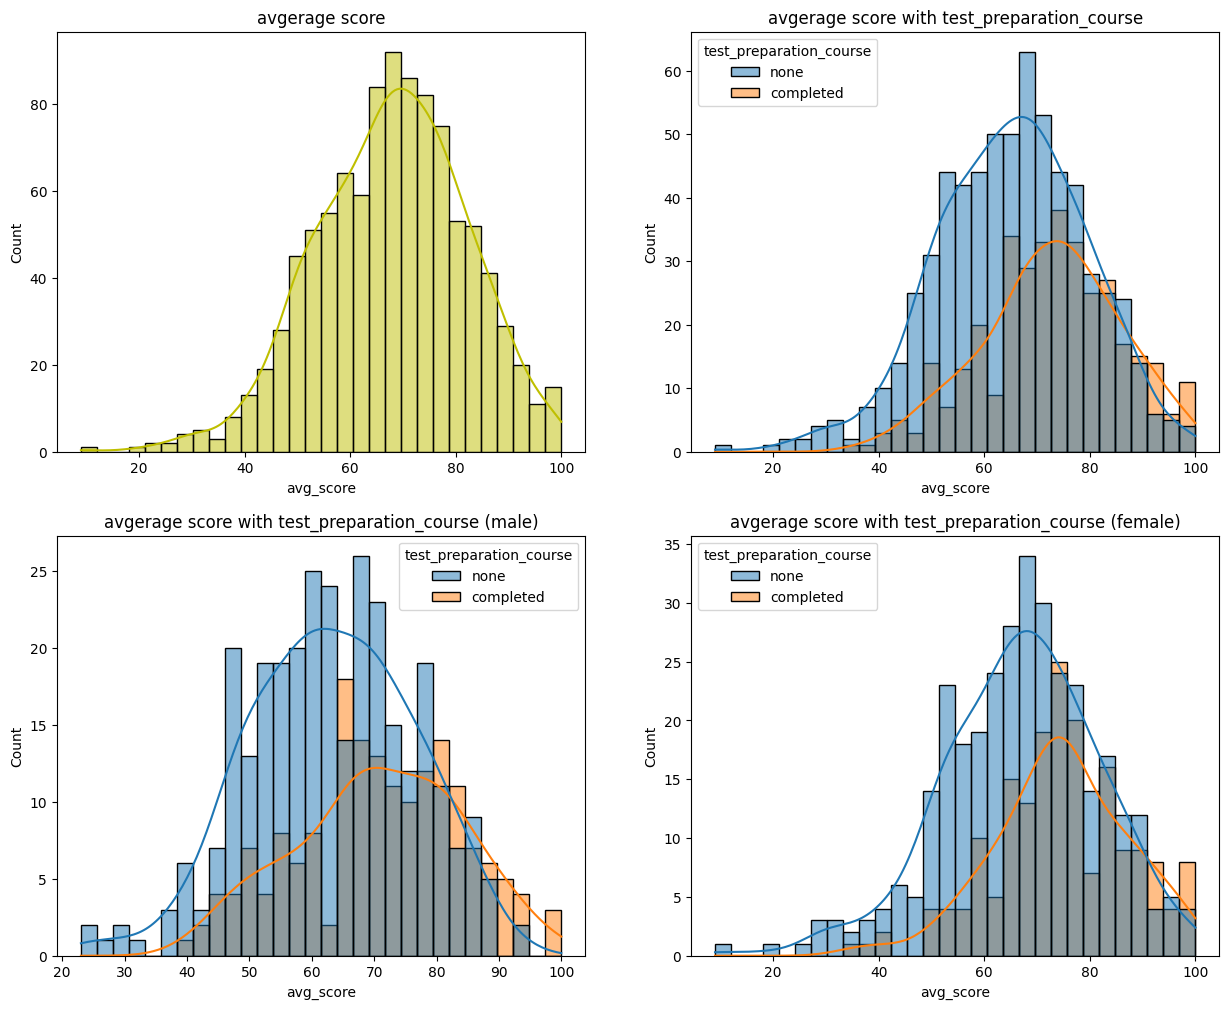

In [ ]:
# visualizing avgerage score wrt test_preparation_course

print("Students who didn't complete test_preparation_course : ", df[df['test_preparation_course']=='none'].value_counts().sum())
print("Students who completed test_preparation_course : ",df[df['test_preparation_course']=='completed'].value_counts().sum())

fig,axis = plt.subplots(2,2,figsize=(15,12))

plt.subplot(2,2,1)
sns.histplot(data=df, x='avg_score', bins=30, kde=True, color='y' )
plt.title('avgerage score')

plt.subplot(2,2,2)
sns.histplot(data=df, x='avg_score', bins=30, kde=True, hue='test_preparation_course')
plt.title('avgerage score with test_preparation_course')

plt.subplot(2,2,3)
sns.histplot(data=df[df['gender']=='male'], x='avg_score', bins=30, kde=True, hue='test_preparation_course')
plt.title('avgerage score with test_preparation_course (male)')

plt.subplot(2,2,4)
sns.histplot(data=df[df['gender']=='female'], x='avg_score', bins=30, kde=True, hue='test_preparation_course')
plt.title('avgerage score with test_preparation_course (female)')

plt.show()

In [ ]:
# Conclusion
# Students who completed test_preparation_course have performed,
# relatively lower than who didn't complete. (a bit strange!)

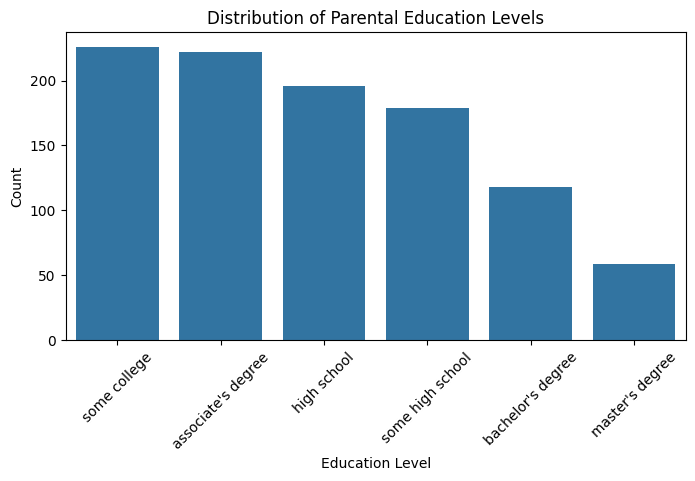

In [ ]:
# Visualizing distribution of parental education levels

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='parental_level_of_education', order=df['parental_level_of_education'].value_counts().index)
plt.title('Distribution of Parental Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


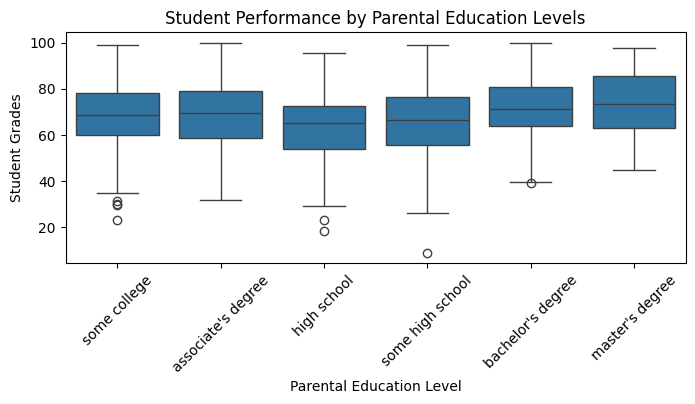

In [ ]:
# visualizing student performance by parental education levels

plt.figure(figsize=(8, 3))
sns.boxplot(x='parental_level_of_education', y='avg_score', data=df, order=df['parental_level_of_education'].value_counts().index)
plt.title('Student Performance by Parental Education Levels')
plt.xlabel('Parental Education Level')
plt.ylabel('Student Grades')
plt.xticks(rotation=45)
plt.show()

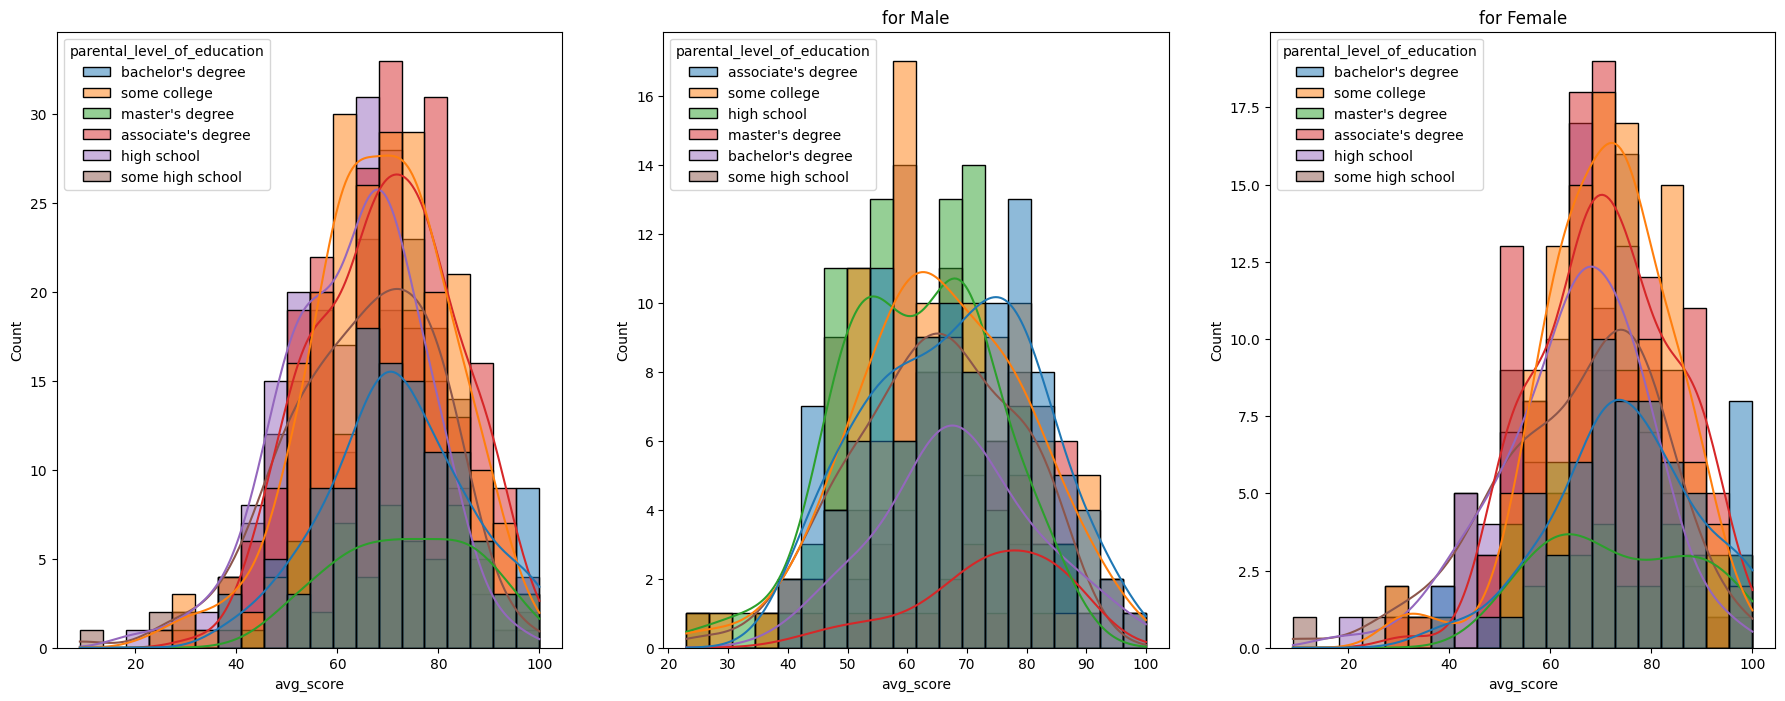

In [ ]:
# visualzing parental eduction with respect to avg_score for male and female

plt.subplots(1,3,figsize=(30,8))

plt.subplot(1,4,1)
ax =sns.histplot(data=df,x='avg_score',bins=20,kde=True,hue='parental_level_of_education')

plt.subplot(1,4,2)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',bins=20, kde=True,hue='parental_level_of_education')
plt.title('for Male')

plt.subplot(1,4,3)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',bins=20, kde=True,hue='parental_level_of_education')
plt.title('for Female')

plt.show()

In [ ]:
# conclusions
# In general parent's education don't help student perform well in exam.
# 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
# 3rd plot we can see there is no effect of parent's education on female students.
# observe the right skewness of kde curve for the mentioned categories

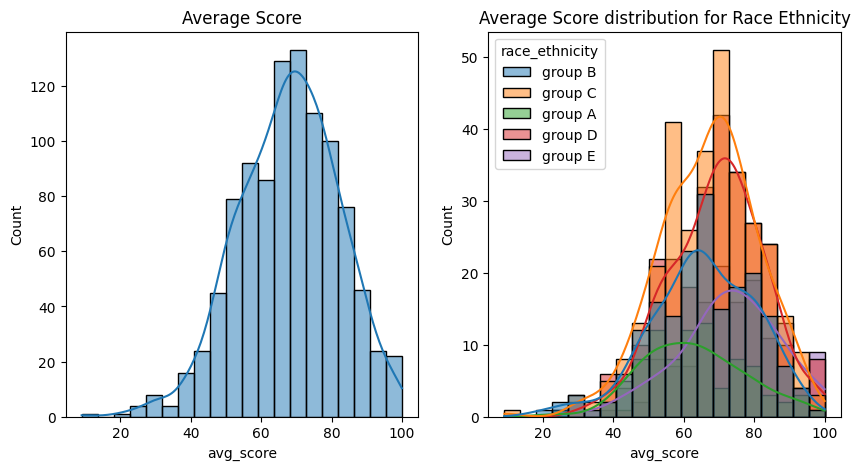

In [ ]:
# visualizing data with respect to race_ethnicity

plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
sns.histplot(data=df, x='avg_score' , kde=True, bins=20)
plt.title('Average Score')

plt.subplot(1,2,2)
sns.histplot(data=df, x='avg_score' , kde=True, bins=20, hue='race_ethnicity')
plt.title('Average Score distribution for Race Ethnicity')

plt.show()

In [ ]:
# Conclusion:
# Student of group A and B tend to perform poorly in exam
# As distribution for group A and group B is left skewed

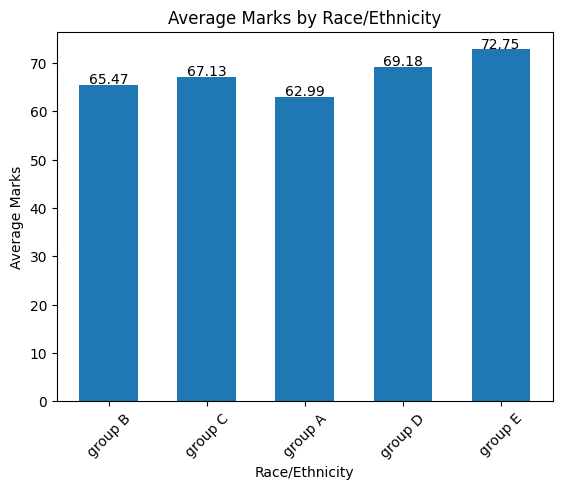

In [ ]:
# Objective - to print avg marks by race ethnicity
import statistics as stt

# Get unique race/ethnicity values
race_eth = list(df['race_ethnicity'].unique())

# Calculate the mean scores by race
mean_by_race = [stt.mean(df[df['race_ethnicity'] == rc]['avg_score']) for rc in race_eth]

# Plot the bar chart
plt.bar(x=race_eth, height=mean_by_race, width=0.6)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Marks')
plt.title('Average Marks by Race/Ethnicity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# Add annotations on top of each bar
for i, value in enumerate(mean_by_race):
    plt.text(i, value + 0.2, round(value, 2), ha='center')
plt.show()

In [ ]:
# Conclusion
# Average marks for group A is lowest

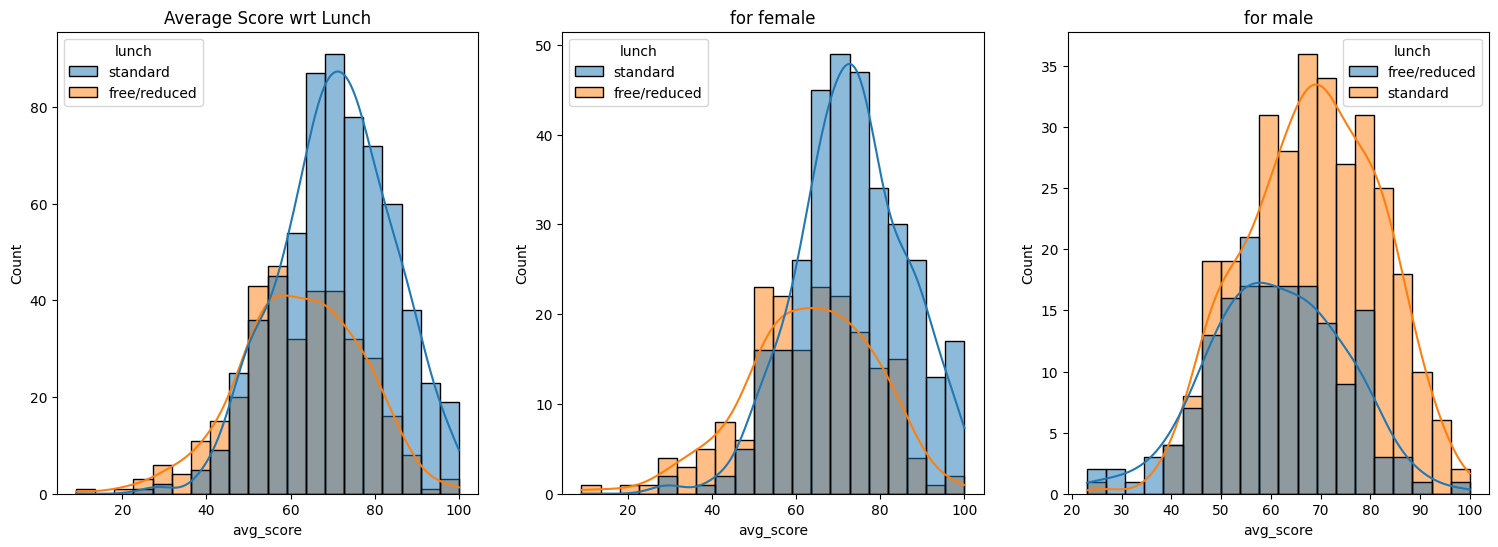

In [ ]:
#  Visualizing average score for lunch feature

plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
sns.histplot(data=df,x='avg_score',bins=20, kde=True,hue='lunch')
plt.title('Average Score wrt Lunch')

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='avg_score',bins=20,kde=True,hue='lunch')
plt.title('for female')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avg_score',bins=20,kde=True,hue='lunch')
plt.title('for male')

plt.show()

In [ ]:
# conclusion:
# Standard Lunch help students perform well in exams
# Standard lunch helps perform well in exams be it a male of female

<Axes: >

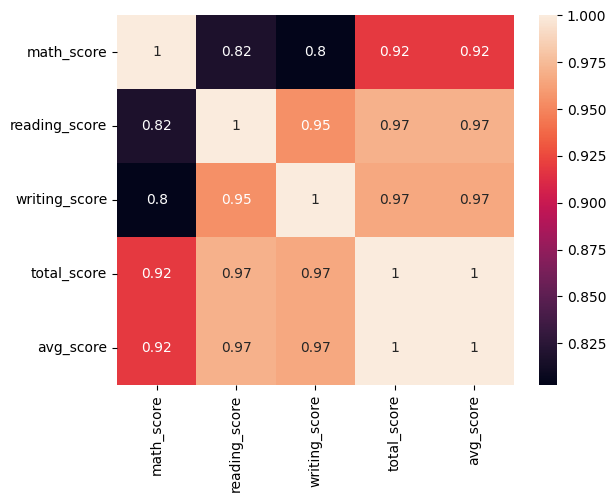

In [ ]:
# heatmap for numerical features

sns.heatmap( (df.select_dtypes(include=['number']) ).corr(),annot=True)

In [ ]:
# All features are positivly correalted with each other,
# as average and total will increase only when marks in maths_score, reading_score, writing_score will increase (or decrease vice-versa).
# Hence, are positivly correlated.

**Q. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?**

#### Key Factors Affecting Students' Performance:
1. **Gender**: Performance differences between males and females.
2. **Ethnicity**: Cultural and socioeconomic backgrounds can influence scores.
3. **Parental Level of Education**: Higher education levels correlate with better student performance.
4. **Lunch Type**: Standard lunch vs. free/reduced lunch may affect concentration and energy levels.
5. **Test Preparation Course**: Students completing the course often perform better.

#### Analyzing These Factors Using Statistical Techniques:
1. **Correlation Analysis**:
   - Evaluate the relationship between numerical features like test scores and continuous factors like parental education.
   
2. **ANOVA**:
   - Compare exam performance among different ethnic groups or lunch types to determine if these factors significantly affect scores.
   
3. **T-tests**:
   - Compare means of performance between genders or test preparation course participants and non-participants.

4. **Multiple Linear Regression**:
   - Quantify how variables like parental education, gender, and test preparation impact exam scores.